# The Judicious Wine - A Wine Quality Prediction System


In [1]:
#Load libaries
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC  
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score, KFold 

#Load dataset
data = pd.read_csv('dataset_WineQuality-Red.csv')     # Red Wine Dataset

# Data Exploration

In [2]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.info() # return data type and number of non-null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.describe() # Statistic summary of Original dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.isnull().sum() # return number of missing value for each column

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data.drop(columns='quality').skew(axis = 0) # return skewness of each independent feature

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

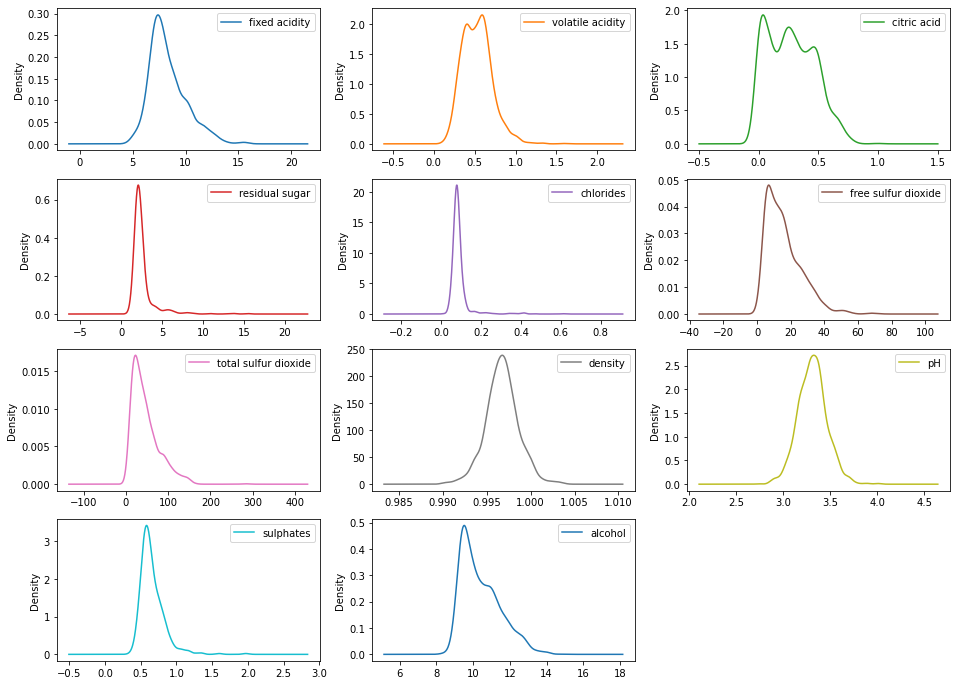

In [7]:
# Density
data.drop(columns='quality').plot(kind='density', subplots=True, layout=(4,3),figsize=(16, 12), sharex=False)
plt.show()

In [8]:
data.corr() #return correlation between columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


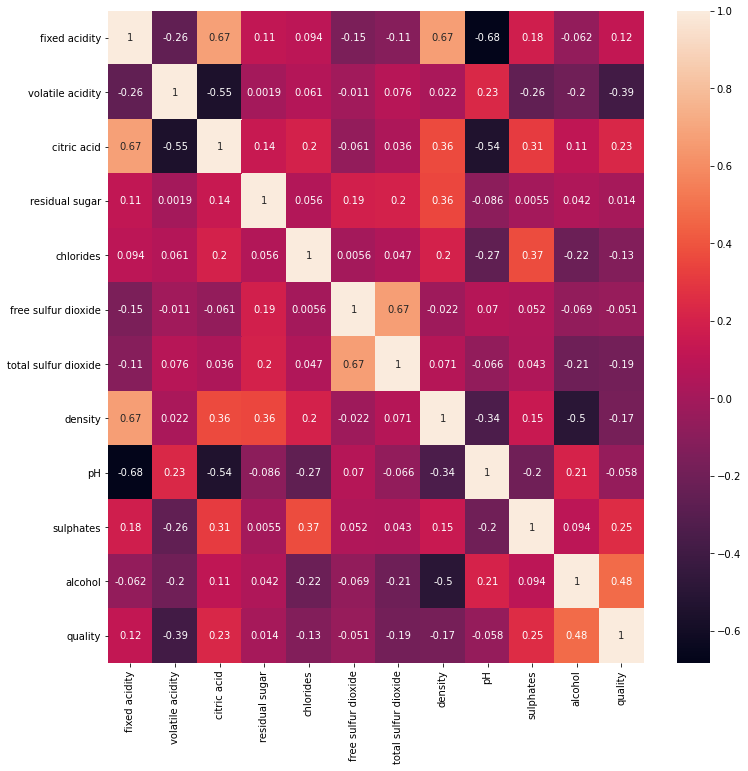

In [9]:
#Correlation matrix
plt.figure(figsize=(12, 12))
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [10]:
data.quality.value_counts() #count target feature 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

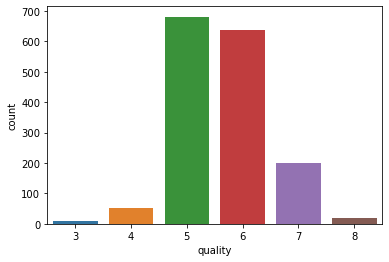

In [11]:
#count plot of target feature
sns.countplot(x='quality', data = data)
plt.show()

# Data Cleaning and Transformation

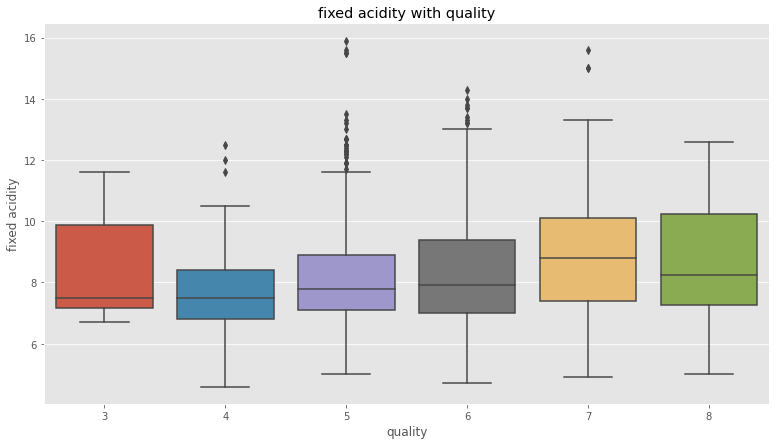

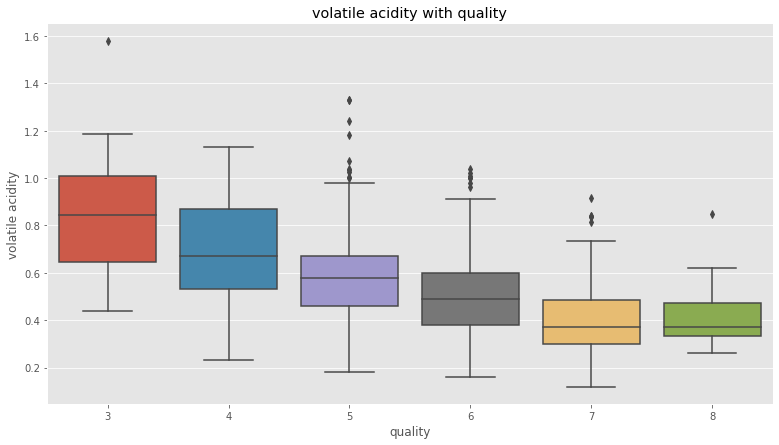

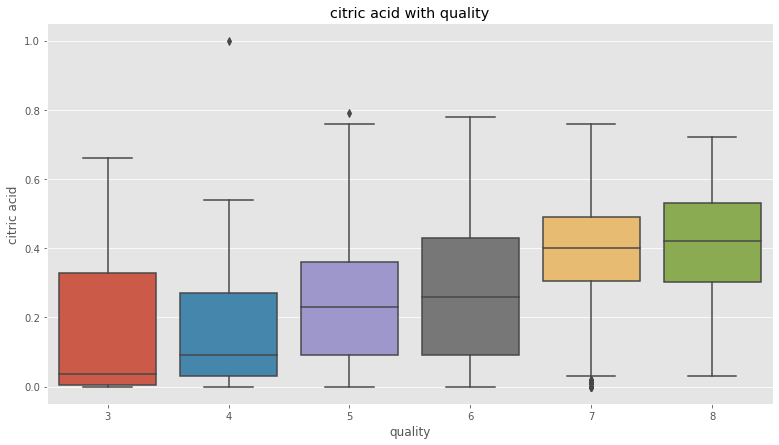

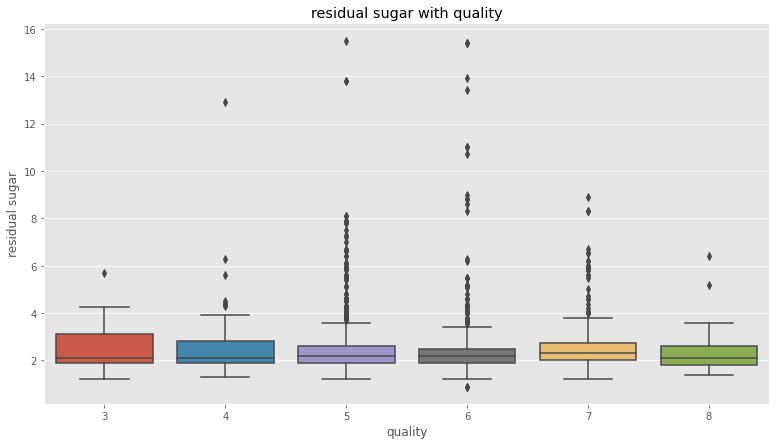

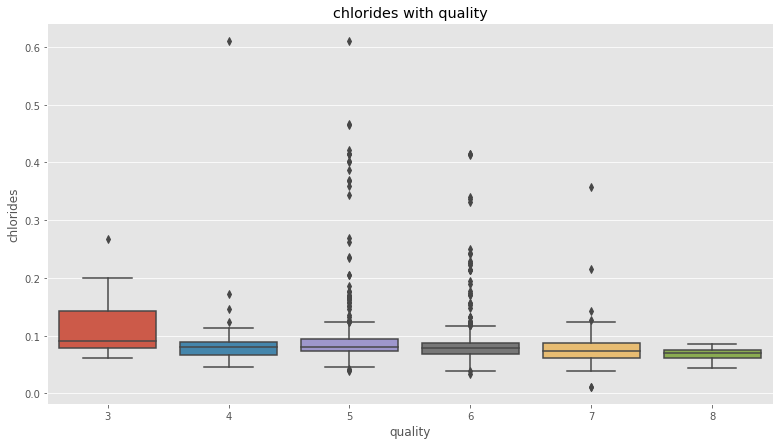

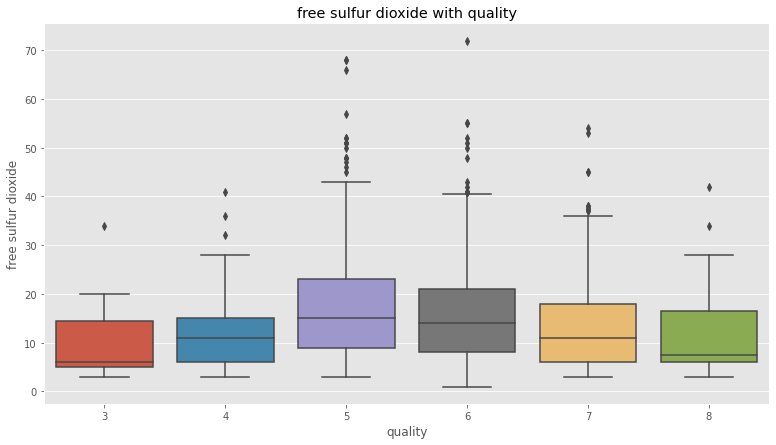

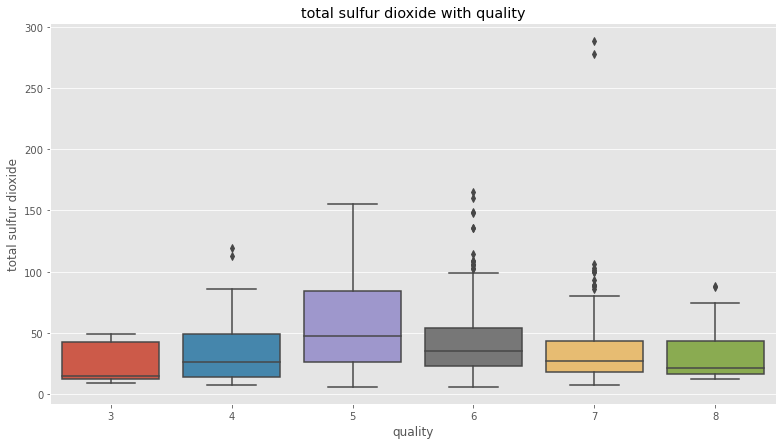

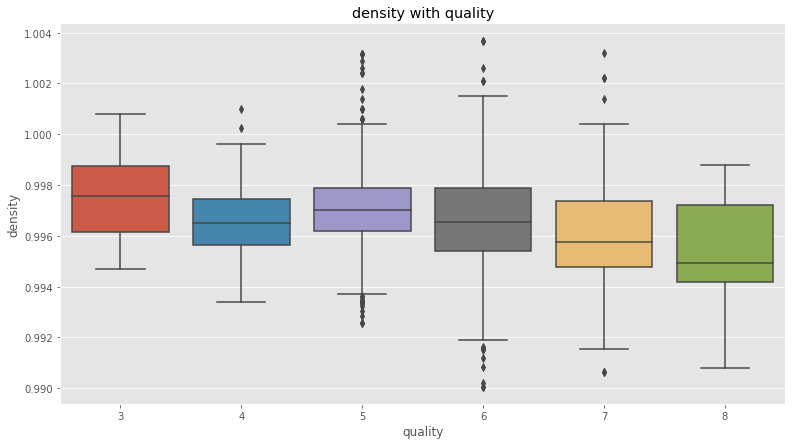

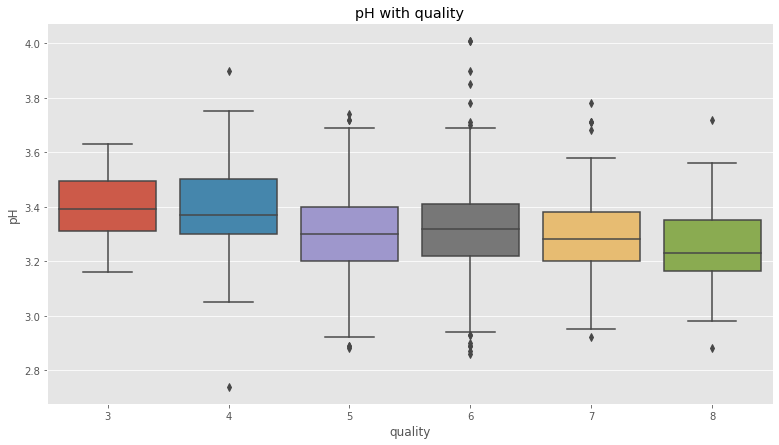

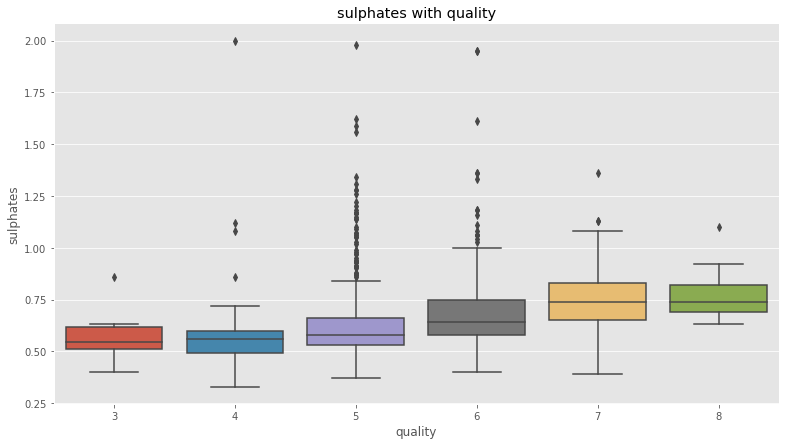

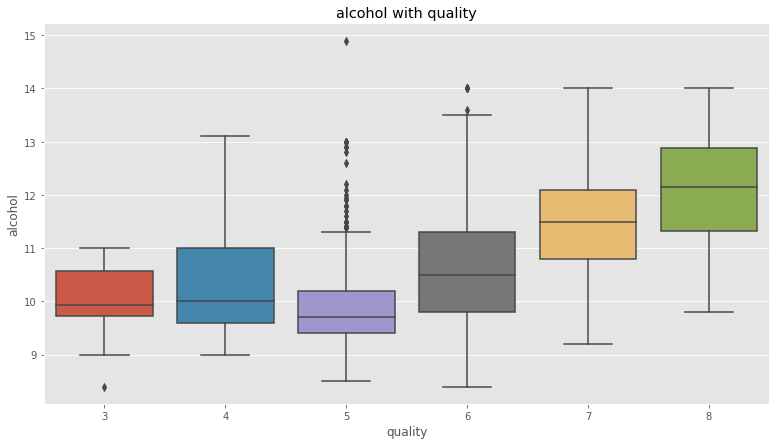

In [12]:
# Visualiztion of outliers data
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
#Boxplot
train = data[column_names]
plt.style.use('ggplot')
for i in column_names:
    plt.figure(figsize=(13, 7))
    plt.title(str(i) + " with " + str('quality'))
    sns.boxplot(x=data.quality, y=train[i])
    plt.show()

In [13]:
# finding outliers using zscore
z = np.abs(stats.zscore(data))
z  # print outliers

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [14]:
data.shape  #Original shape

(1599, 12)

In [15]:
np.count_nonzero(np.where( z > 3)) # count number of outliers

372

In [16]:
data_outlier_z = data[(z <= 3).all(axis=1)] #dropped outliers
data_outlier_z.shape     #shape after removed outliers

(1451, 12)

In [17]:
data_outlier_z.describe()  # Statistic summary after removed outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,8.310062,0.522950,0.265382,2.387285,0.081425,15.104755,43.735355,0.996710,3.315934,0.642584,10.421089,5.659545
std,1.646458,0.168531,0.190934,0.862078,0.020966,9.309768,29.441284,0.001716,0.141096,0.129801,1.021588,0.781605
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.500000,4.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.630000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000


In [18]:
scaler = StandardScaler() # Normalize data using z-score normalizer
data_normalize_z = scaler.fit_transform(data_outlier_z.drop(columns=['quality']))

In [19]:
data_normalize_z_df = pd.DataFrame(data_normalize_z,columns=['fixed acidity', 
                        'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])

In [20]:
data_normalize_z_df.describe() # Statistic summary after normalied the data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03
mean,1.903677e-16,-3.247268e-16,3.798172e-16,-2.555579e-16,6.258873e-17,-3.516981e-16,-2.139293e-16,2.754730e-14,-5.232815e-16,-2.678002e-18,-5.737810e-16
std,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00
min,-2.011107e+00,-2.391780e+00,-1.390400e+00,-1.377711e+00,-2.071930e+00,-1.515571e+00,-1.282158e+00,-3.038010e+00,-3.090697e+00,-2.409013e+00,-1.881141e+00
25%,-7.352022e-01,-7.891466e-01,-9.188691e-01,-5.654394e-01,-5.451269e-01,-8.708649e-01,-7.724932e-01,-6.473232e-01,-6.801546e-01,-7.135260e-01,-9.019354e-01
50%,-2.491430e-01,-1.750841e-02,-8.059242e-02,-2.173229e-01,-1.157137e-01,-2.261583e-01,-2.628289e-01,-5.919353e-03,-4.206991e-02,-1.740528e-01,-2.164915e-01
75%,5.407031e-01,6.354162e-01,8.100766e-01,2.468324e-01,3.614121e-01,6.334505e-01,4.846787e-01,6.354845e-01,5.960148e-01,5.966233e-01,6.647935e-01
max,3.153271e+00,3.069044e+00,2.748591e+00,5.004424e+00,6.898036e+00,3.427179e+00,3.440732e+00,3.201100e+00,3.077455e+00,3.987598e+00,3.112807e+00


In [21]:
data_normalize_z_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.552930,1.050914,-1.390400,-0.565439,-0.258851,-0.441060,-0.330784,0.635485,1.375896,-0.636458,-0.999856
1,-0.309900,2.119336,-1.390400,0.246832,0.790825,1.063255,0.790477,0.052390,-0.821951,0.288353,-0.608174
2,-0.309900,1.407054,-1.180831,-0.101284,0.504550,-0.011256,0.348768,0.169009,-0.396561,0.057150,-0.608174
3,1.755851,-1.442071,1.543569,-0.565439,-0.306564,0.203646,0.552634,0.752103,-1.105544,-0.482323,-0.608174
4,-0.552930,1.050914,-1.390400,-0.565439,-0.258851,-0.441060,-0.330784,0.635485,1.375896,-0.636458,-0.999856
...,...,...,...,...,...,...,...,...,...,...,...
1446,-1.282019,0.457346,-0.971261,-0.449401,0.409125,1.815413,0.008992,-1.055489,0.950506,-0.482323,0.077270
1447,-1.464291,0.160562,-0.866477,-0.217323,-0.926828,2.567570,0.246835,-0.927209,1.446794,0.904894,0.762714
1448,-1.221261,-0.076865,-0.709300,-0.101284,-0.258851,1.493059,-0.126918,-0.565690,0.737811,0.827826,0.566873
1449,-1.464291,0.724451,-0.761692,-0.449401,-0.306564,1.815413,0.008992,-0.723125,1.801286,0.519556,-0.216491


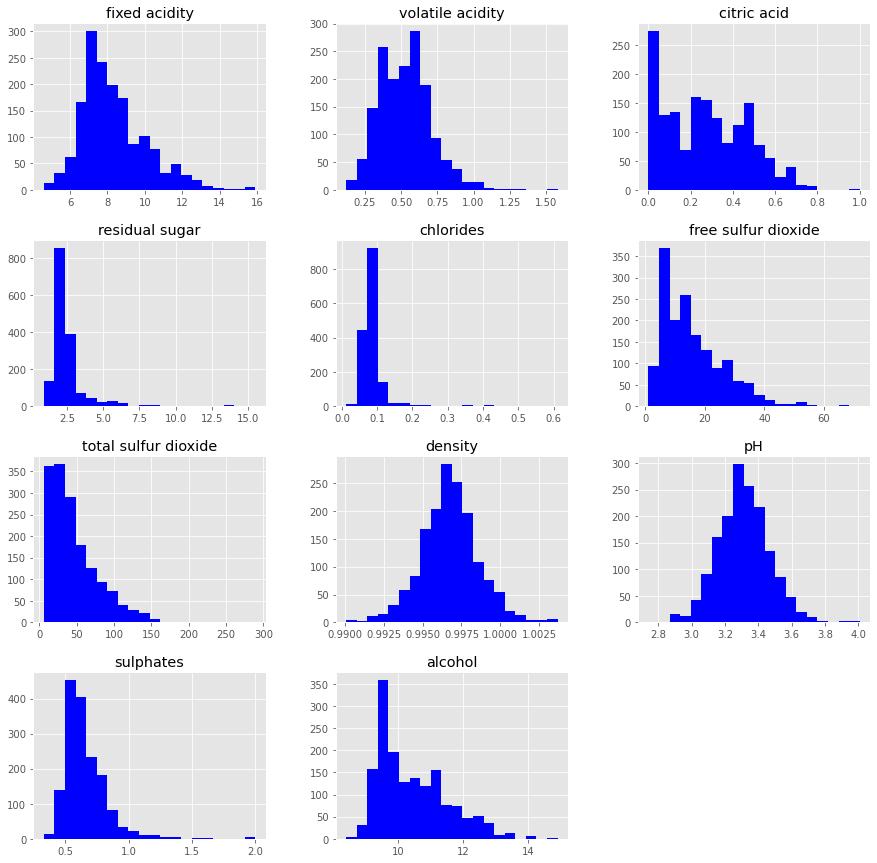

In [22]:
# Histograms
data.drop(columns=['quality']).hist(bins=20, figsize=(15,15),color='b'); # Original data

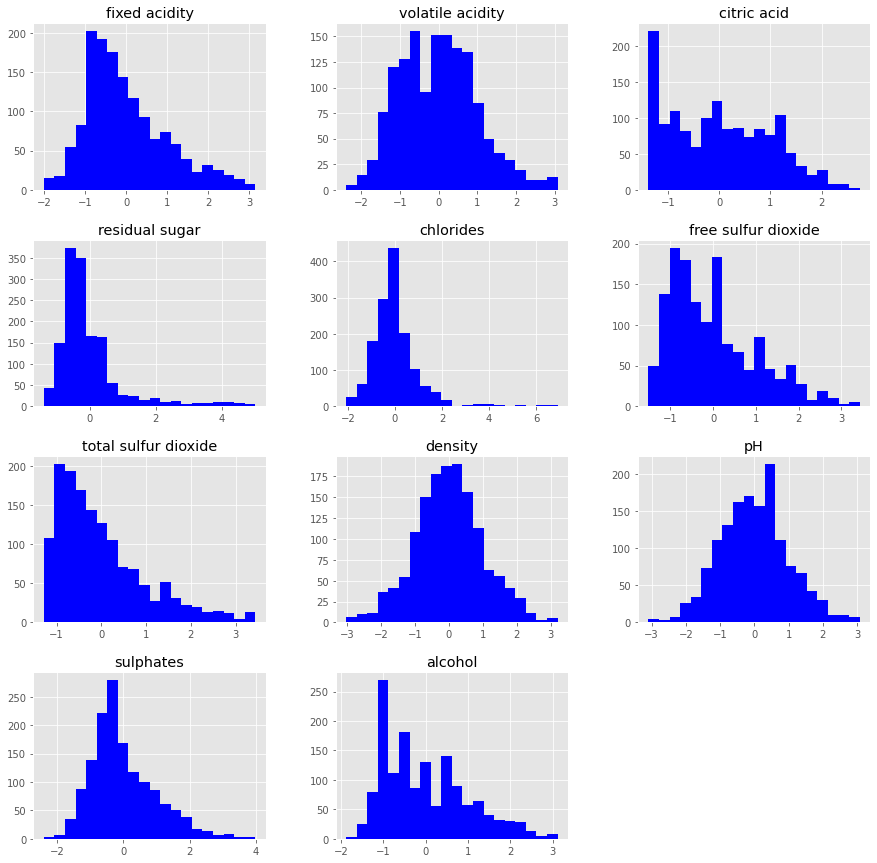

In [23]:
# Histograms
data_normalize_z_df.hist(bins=20, figsize=(15,15),color='b'); # After removed outliers and normalied data

# Select relevant features

In [24]:
#Filter method
# Pearson correlation coefificient
# Creating set to hold the correlated features
corr_features = set()
corr_threshold = 0.5
for i in range(len(corr.columns)):                  
    for j in range(i):
        if abs (corr.iloc[i,j]) > corr_threshold:
            colname = corr.columns[i]
            corr_features.add(colname)

In [25]:
 corr_features

{'citric acid', 'density', 'pH', 'total sulfur dioxide'}

# Applying models and evalution

In [26]:
X_orig = data.drop(columns=['quality']).values             #Original data
Y_orig = data['quality'].values

X = data_normalize_z_df[corr_features].values          #Data after romoved outliers and normalized
Y = data_outlier_z['quality'].values

X_out = data_outlier_z[corr_features].values       #Data after remove outliers without normalization
Y_out = data_outlier_z['quality'].values

In [27]:
# 20% test 80% training data             
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_orig, Y_orig, test_size=0.2, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_out, Y_out, test_size=0.2, random_state=0)



# Random Forest Model¶

In [28]:
#Create a Gaussian Classifier
RF_orig = RandomForestClassifier(n_estimators= 100)                    #Original data    

#Train the model using the training sets y_pred=clf.predict(X_test)
RF_orig.fit(X_train_orig,y_train_orig)

RF_y_pred_orig = RF_orig.predict(X_test_orig) 


#Create a Gaussian Classifier
RF = RandomForestClassifier(n_estimators=100)                        #Data after romoved outliers and normalized

#Train the model using the training sets y_pred=clf.predict(X_test)
RF.fit(X_train,y_train)

RF_y_pred= RF.predict(X_test)


#Create a Gaussian Classifier
RF_out = RandomForestClassifier(n_estimators= 100)                    #Data after romoved outliers without normalization

#Train the model using the training sets y_pred=clf.predict(X_test)
RF_out.fit(X_train_out,y_train_out)

RF_y_pred_out= RF_out.predict(X_test_out)



<AxesSubplot:>

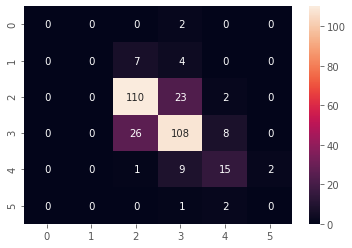

In [29]:
#making confusing matrix
RF_cm_orig = confusion_matrix(y_test_orig, RF_y_pred_orig)
sns.heatmap(RF_cm_orig,annot=True,fmt='2.0f')

In [71]:
print(classification_report(y_test_orig, RF_y_pred_orig))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.76      0.81      0.79       135
           6       0.73      0.76      0.75       142
           7       0.56      0.56      0.56        27
           8       0.00      0.00      0.00         3

    accuracy                           0.73       320
   macro avg       0.34      0.36      0.35       320
weighted avg       0.70      0.73      0.71       320



<AxesSubplot:>

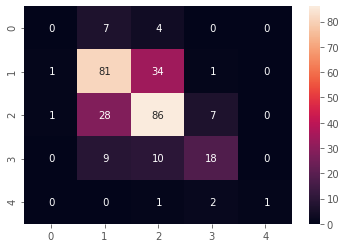

In [31]:
#making confusing matrix
RF_cm = confusion_matrix(y_test, RF_y_pred)
sns.heatmap(RF_cm,annot=True,fmt='2.0f')

In [32]:
print(classification_report(y_test, RF_y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.65      0.69      0.67       117
           6       0.64      0.70      0.67       122
           7       0.64      0.49      0.55        37
           8       1.00      0.25      0.40         4

    accuracy                           0.64       291
   macro avg       0.59      0.43      0.46       291
weighted avg       0.62      0.64      0.63       291



<AxesSubplot:>

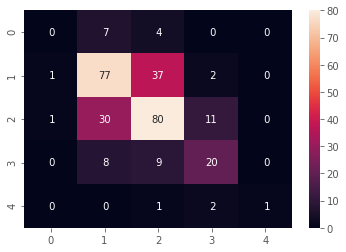

In [33]:
#making confusing matrix
RF_cm_out = confusion_matrix(y_test_out, RF_y_pred_out)
sns.heatmap(RF_cm_out,annot=True,fmt='2.0f')

In [34]:
print(classification_report(y_test_out, RF_y_pred_out))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.63      0.66      0.64       117
           6       0.61      0.66      0.63       122
           7       0.57      0.54      0.56        37
           8       1.00      0.25      0.40         4

    accuracy                           0.61       291
   macro avg       0.56      0.42      0.45       291
weighted avg       0.60      0.61      0.60       291



In [74]:
# Using Holdout evalution method
# Model Accuracy, how often is the classifier correct?
print("RF-Accuracy-Orig:%.3f%%" %(metrics.accuracy_score(y_test_orig, RF_y_pred_orig)*100))

RF-Accuracy-Orig:72.812%


In [76]:
print("RF-Accuracy:%.3f%%" % (metrics.accuracy_score(y_test, RF_y_pred)*100))

RF-Accuracy:63.918%


In [78]:
print("RF-Accuracy-Out:%.3f%%" % (metrics.accuracy_score(y_test_out, RF_y_pred_out)*100))

RF-Accuracy-Out:61.168%


# Suport Vector Machine Model

In [38]:
# Fitting Kernel SVM to the Training set
SVM_orig = SVC(kernel = 'rbf', random_state = 0)                     # Original Datasets
SVM_orig.fit(X_train_orig, y_train_orig)

#Predicting the Test Set
SVM_y_pred_orig = SVM_orig.predict(X_test_orig)


# Fitting Kernel SVM to the Training set                             #Data after romoved outliers and normalized
SVM = SVC(kernel = 'rbf', random_state = 0)
SVM.fit(X_train, y_train)

#Predicting the Test Set
SVM_y_pred = SVM.predict(X_test)


# Fitting Kernel SVM to the Training set                             #Data after romoved outliers without normalization
SVM_out = SVC(kernel = 'rbf', random_state = 0)
SVM_out.fit(X_train_out, y_train_out)

#Predicting the Test Set
SVM_y_pred_out = SVM_out.predict(X_test_out)


<AxesSubplot:>

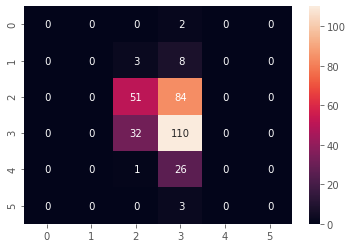

In [39]:
#making confusing matrix
SVM_cm_orig = confusion_matrix(y_test_orig, SVM_y_pred_orig)
sns.heatmap(SVM_cm_orig,annot=True,fmt='2.0f')

In [80]:
print(classification_report(y_test_orig, SVM_y_pred_orig))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.59      0.38      0.46       135
           6       0.47      0.77      0.59       142
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         3

    accuracy                           0.50       320
   macro avg       0.18      0.19      0.17       320
weighted avg       0.46      0.50      0.45       320



<AxesSubplot:>

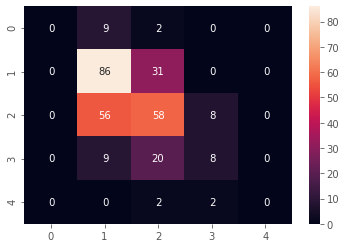

In [41]:
SVM_cm = confusion_matrix(y_test, SVM_y_pred)
sns.heatmap(SVM_cm,annot=True,fmt='2.0f')

In [42]:
print(classification_report(y_test, SVM_y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.54      0.74      0.62       117
           6       0.51      0.48      0.49       122
           7       0.44      0.22      0.29        37
           8       0.00      0.00      0.00         4

    accuracy                           0.52       291
   macro avg       0.30      0.29      0.28       291
weighted avg       0.49      0.52      0.49       291



<AxesSubplot:>

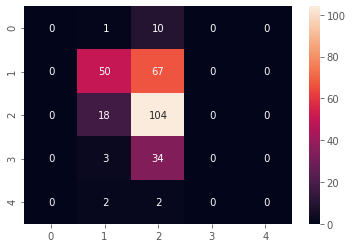

In [43]:
SVM_cm_out = confusion_matrix(y_test_out, SVM_y_pred_out)
sns.heatmap(SVM_cm_out,annot=True,fmt='2.0f')

In [44]:
print(classification_report(y_test_out, SVM_y_pred_out))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.68      0.43      0.52       117
           6       0.48      0.85      0.61       122
           7       0.00      0.00      0.00        37
           8       0.00      0.00      0.00         4

    accuracy                           0.53       291
   macro avg       0.23      0.26      0.23       291
weighted avg       0.47      0.53      0.47       291



In [45]:
kfold = KFold(n_splits=10,random_state=7,shuffle=True)

In [81]:
#k-Fold cross validation for improving model
SVM_Result_orig = cross_val_score(estimator = SVM_orig, X = X_train_orig,
                             y = y_train_orig, cv = kfold)
print("SVM-Accuracy-Orig: %.3f%% (%.3f%%)" % (SVM_Result_orig.mean()*100.0,SVM_Result_orig.std()*100.0) )

SVM-Accuracy-Orig: 49.797% (4.609%)


In [82]:
SVM_Result = cross_val_score(estimator = SVM, X = X_train,
                             y = y_train, cv = kfold)
print("SVM-Accuracy: %.3f%% (%.3f%%)" % (SVM_Result.mean()*100.0,SVM_Result.std()*100.0) )

SVM-Accuracy: 55.172% (4.152%)


In [83]:
SVM_Result_out = cross_val_score(estimator = SVM_out, X = X_train_out,
                             y = y_train_out, cv = kfold)
print("SVM-Accuracy-Out: %.3f%% (%.3f%%)" % (SVM_Result_out.mean()*100.0,SVM_Result_out.std()*100.0) )

SVM-Accuracy-Out: 47.414% (3.226%)


# K-Nearest Neighbor Model

In [49]:
KNN_orig = KNeighborsClassifier(n_neighbors=5)                        # Original Datasets
KNN_orig.fit(X_train_orig, y_train_orig)
KNN_y_pred_orig = KNN_orig.predict(X_test_orig)


KNN = KNeighborsClassifier(n_neighbors=5)                            #Data after romoved outliers and normalized
KNN.fit(X_train, y_train)
KNN_y_pred = KNN.predict(X_test)


KNN_out = KNeighborsClassifier(n_neighbors=5)                        #Data after romoved outliers without normalization
KNN_out.fit(X_train_out, y_train_out)
KNN_y_pred_out = KNN_out.predict(X_test_out)

<AxesSubplot:>

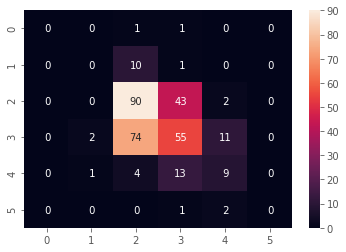

In [50]:
#making confusing matrix
KNN_cm_orig = confusion_matrix(y_test_orig, KNN_y_pred_orig)
sns.heatmap(KNN_cm_orig,annot=True,fmt='2.0f')

In [85]:
print(classification_report(y_test_orig, KNN_y_pred_orig))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.50      0.67      0.57       135
           6       0.48      0.39      0.43       142
           7       0.38      0.33      0.35        27
           8       0.00      0.00      0.00         3

    accuracy                           0.48       320
   macro avg       0.23      0.23      0.23       320
weighted avg       0.46      0.48      0.46       320



<AxesSubplot:>

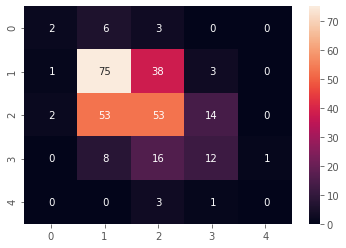

In [86]:
KNN_cm= confusion_matrix(y_test, KNN_y_pred)
sns.heatmap(KNN_cm,annot=True,fmt='2.0f')

In [53]:
print(classification_report(y_test, KNN_y_pred))

              precision    recall  f1-score   support

           4       0.40      0.18      0.25        11
           5       0.53      0.64      0.58       117
           6       0.47      0.43      0.45       122
           7       0.40      0.32      0.36        37
           8       0.00      0.00      0.00         4

    accuracy                           0.49       291
   macro avg       0.36      0.32      0.33       291
weighted avg       0.47      0.49      0.48       291



<AxesSubplot:>

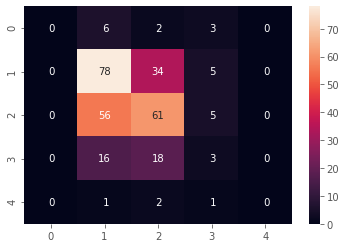

In [54]:
KNN_cm_out= confusion_matrix(y_test_out, KNN_y_pred_out)
sns.heatmap(KNN_cm_out,annot=True,fmt='2.0f')

In [55]:
print(classification_report(y_test_out, KNN_y_pred_out))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.50      0.67      0.57       117
           6       0.52      0.50      0.51       122
           7       0.18      0.08      0.11        37
           8       0.00      0.00      0.00         4

    accuracy                           0.49       291
   macro avg       0.24      0.25      0.24       291
weighted avg       0.44      0.49      0.46       291



In [56]:
#k-Fold cross validation for improving model
KNN_Result_orig = cross_val_score(estimator = KNN_orig, X = X_train_orig,
                             y = y_train_orig, cv = kfold)
print("KNN-Accuracy-Orig: %.3f%% (%.3f%%)" % (KNN_Result_orig.mean()*100.0,KNN_Result_orig.std()*100.0) )

KNN-Accuracy-Orig: 49.571% (4.302%)


In [57]:
KNN_Result = cross_val_score(estimator = KNN, X = X_train,
                             y = y_train, cv = kfold)
print("KNN-Accuracy: %.3f%% (%.3f%%)" % (KNN_Result.mean()*100.0,KNN_Result.std()*100.0) )

KNN-Accuracy: 50.690% (2.241%)


In [58]:
#k-Fold cross validation for improving model
KNN_Result_out = cross_val_score(estimator = KNN_out, X = X_train_out,
                             y = y_train_out, cv = kfold)
print("KNN-Accuracy-Out: %.3f%% (%.3f%%)" % (KNN_Result_out.mean()*100.0,KNN_Result_out.std()*100.0) )

KNN-Accuracy-Out: 47.500% (3.543%)


# Improving accuracy score

In [87]:
rfc = RandomForestClassifier()
parameters = {
   "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
}

In [156]:
cv = GridSearchCV(rfc,parameters,cv=5)                      # CV=5 --> 5-fold cross-validation
cv.fit(X_train_orig,y_train_orig.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [157]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [158]:
display(cv)

Best parameters are: {'max_depth': None, 'n_estimators': 100}


0.549 + or -0.01 for the {'max_depth': 2, 'n_estimators': 5}
0.561 + or -0.029 for the {'max_depth': 2, 'n_estimators': 10}
0.568 + or -0.017 for the {'max_depth': 2, 'n_estimators': 50}
0.561 + or -0.017 for the {'max_depth': 2, 'n_estimators': 100}
0.562 + or -0.019 for the {'max_depth': 2, 'n_estimators': 250}
0.584 + or -0.012 for the {'max_depth': 4, 'n_estimators': 5}
0.582 + or -0.002 for the {'max_depth': 4, 'n_estimators': 10}
0.582 + or -0.021 for the {'max_depth': 4, 'n_estimators': 50}
0.588 + or -0.022 for the {'max_depth': 4, 'n_estimators': 100}
0.591 + or -0.025 for the {'max_depth': 4, 'n_estimators': 250}
0.593 + or -0.035 for the {'max_depth': 8, 'n_estimators': 5}
0.628 + or -0.024 for the {'max_depth': 8, 'n_estimators': 10}
0.635 + or -0.014 for the {'max_depth': 8, 'n_estimators': 50}
0.635 + or -0.023 for the {'max_depth': 8, 'n_estimators': 100}
0.643 + or -0.012 for the {'max_depth': 8, 'n_estimat

In [228]:
#Create a Gaussian Classifier
rf = RandomForestClassifier(max_depth=None, n_estimators= 100)                    #Original data    

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train_orig,y_train_orig)

rf_y_pred = rf.predict(X_test_orig) 
# Using Holdout evalution method
# Model Accuracy, how often is the classifier correct?
print("RF-Accuracy-Orig:%.3f%%" %(metrics.accuracy_score(y_test_orig, rf_y_pred)*100))

RF-Accuracy-Orig:75.312%
